# ISL Lab 07. Moving Beyond Linearity

2020.08.15 김채형

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 7.8.1 Polynomial Regression and Step Functions

In [4]:
wage = pd.read_csv('../datasets/Wage.csv', index_col=0)
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [5]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 304.7+ KB


In [7]:
# object -> category 로 변경
wage.iloc[:, 2:10] = wage.iloc[:, 2:10].apply(pd.Categorical)

In [8]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   sex         3000 non-null   category
 3   maritl      3000 non-null   category
 4   race        3000 non-null   category
 5   education   3000 non-null   category
 6   region      3000 non-null   category
 7   jobclass    3000 non-null   category
 8   health      3000 non-null   category
 9   health_ins  3000 non-null   category
 10  logwage     3000 non-null   float64 
 11  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 141.7 KB


In [11]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
polf = pol.fit_transform(wage.loc[:, 'age'].values.reshape(-1,1))

In [15]:
polf.shape

(3000, 5)

In [16]:
polf[:, 1].shape

(3000,)

In [17]:
wage['age_2'] = polf[:, 1]
wage['age_3'] = polf[:, 2]
wage['age_4'] = polf[:, 3]
wage['age_5'] = polf[:, 4]

In [18]:
wage['wage_250'] = (wage.wage > 250).map({True: 1, False: 0})

In [19]:
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_2,age_3,age_4,age_5,wage_250
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,324.0,5832.0,104976.0,1889568.0,0
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,576.0,13824.0,331776.0,7962624.0,0
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,2025.0,91125.0,4100625.0,184528125.0,0
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,1849.0,79507.0,3418801.0,147008443.0,0
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,2500.0,125000.0,6250000.0,312500000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293,1936.0,85184.0,3748096.0,164916224.0,0
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464,900.0,27000.0,810000.0,24300000.0,0
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408,729.0,19683.0,531441.0,14348907.0,0
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033,729.0,19683.0,531441.0,14348907.0,0


In [20]:
X = wage.loc[:, ['age', 'age_2', 'age_3', 'age_4']]
y = wage.wage

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-184.15417977415404,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

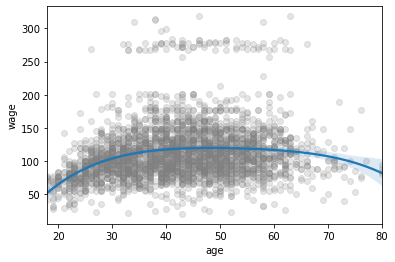

In [25]:
sns.regplot(x='age', y='wage', data=wage, order=4, scatter_kws={'alpha': 0.2, 'color': 'gray', 'facecolor': None})

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

lin_reg_sm = ols(formula='wage ~ age + age_2 + age_3 + age_4 + age_5', data=wage).fit()
anova_sm = sm.stats.anova_lm(lin_reg_sm, typ=1) # Type 1 for compatibility with the book

anova_sm

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,1.998697e+05,199869.664970,125.444324,1.491111e-28
age_2,1.0,2.287860e+05,228786.010128,143.593107,2.367734e-32
age_3,1.0,1.575569e+04,15755.693664,9.888756,1.679213e-03
age_4,1.0,6.070152e+03,6070.152124,3.809813,5.104623e-02
age_5,1.0,1.282563e+03,1282.563017,0.804976,3.696820e-01
Residual,2994.0,4.770322e+06,1593.293816,NaN,NaN


In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(fit_intercept=True, C=1e9)
log_reg.fit(X, wage.wage_250)
log_reg.intercept_, log_reg.coef_

(array([-5.64988378e-05]),
 array([[-1.12834474e-03, -1.60767961e-02,  5.10936224e-04,
         -4.28423037e-06]]))

## 7.8.3 GAMs

In [ ]:
year_spl = dmatrix('cr(year, df=4)', data=wage, return_type='dataframe').drop('Intercept', axis=1)
age_spl = dmatrix('cr(age, df=5)', data=wage, return_type='dataframe').drop('Intercept', axis=1)

edu_gam = pd.get_dummies(wage.education).iloc[:, 1:]
wage_gam = pd.concat([wage.wage, year_spl, age_spl, edu_gam], axis=1)

X = wage_gam.iloc[:, 1:14]
y = wage_gam.wage

gam = LinearRegression(fit_intercept=True)
gam.fit(X, y)

gam.intercept_, gam.coef_